Label: 1 >> Object size: 1914


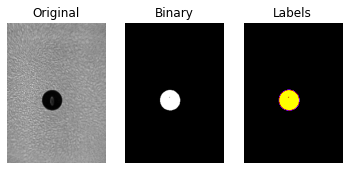

In [8]:
from skimage.io import imread, imshow
from skimage.filters import threshold_otsu
from skimage import measure
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import imageio
import numpy as np

#file to analyse are listed here 
experiment_video='2401Camera_20_46_00.avi'

fr=.5 #frame interval time in microseconds  (2MHz)
scale=6e-6 #size of one pixel in m

#read images from the movies into a numpy array simplifies things if video is not too long
mo = imageio.mimread(experiment_video)

mov = np.asarray(([rgb2gray(mo[nn]) for nn in range(len(mo))]))*256

x1,x2= 10,250
y1,y2= 19,360
#crop movie
mov = mov[:,y1:y2,x1:x2]

mov2=np.copy(mov)

original=mov2[10,:,:]
binary = original < threshold_otsu(original)
labels = measure.label(binary)

plots = {'Original': original, 'Binary': binary, 'Labels': labels}
fig, ax = plt.subplots(1, len(plots))
for n, (title, img) in enumerate(plots.items()):
    cmap = plt.cm.gnuplot if n == len(plots) - 1 else plt.cm.gray
    ax[n].imshow(img, cmap=cmap)
    ax[n].axis('off')
    ax[n].set_title(title)


props = measure.regionprops(labels)
for prop in props:
    print('Label: {} >> Object size: {}'.format(prop.label, prop.area))

In [11]:
props[0].axis_minor_length


49.88709374663206

In [12]:
props[0].axis_major_length

49.88709374663206